In [1]:
from nltk import pos_tag, RegexpParser, word_tokenize

# 1st sentence

In [2]:
text = "Moroccan fairy tale ends at the hands of France."

In [3]:
tokens = word_tokenize(text)
tags = pos_tag(tokens)
tags

[('Moroccan', 'JJ'),
 ('fairy', 'NN'),
 ('tale', 'NN'),
 ('ends', 'VBZ'),
 ('at', 'IN'),
 ('the', 'DT'),
 ('hands', 'NNS'),
 ('of', 'IN'),
 ('France', 'NNP'),
 ('.', '.')]

In [4]:
chunker = RegexpParser("""
NP: {} # Noun phrase
P: {} # Phrase
V: {} # Verb
PP: {} 
VP: {}
""")

result = chunker.parse(tags)

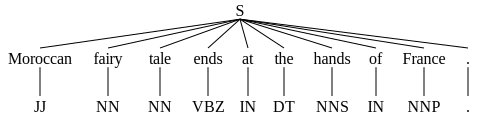

In [5]:
result

In [6]:
print(result)

(S
  Moroccan/JJ
  fairy/NN
  tale/NN
  ends/VBZ
  at/IN
  the/DT
  hands/NNS
  of/IN
  France/NNP
  ./.)


In [7]:
print(repr(result))

Tree('S', [('Moroccan', 'JJ'), ('fairy', 'NN'), ('tale', 'NN'), ('ends', 'VBZ'), ('at', 'IN'), ('the', 'DT'), ('hands', 'NNS'), ('of', 'IN'), ('France', 'NNP'), ('.', '.')])


In [8]:
result.draw() # tkinter window will open

In [9]:
import spacy
# Loading the model
nlp = spacy.load("en_core_web_sm")

# Creating Doc object
doc = nlp(text)

# Getting dependies tags
for token in doc:
    print(token.text , "=>", token.dep_)

/home/dai/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2022-12-19 11:26:34.189091: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-19 11:26:34.553094: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-12-19 11:26:34.588516: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been reg

Moroccan => amod
fairy => compound
tale => nsubj
ends => ROOT
at => prep
the => det
hands => pobj
of => prep
France => pobj
. => punct


In [10]:
# Importing the visualizer
from spacy import displacy

In [11]:
# Visualizing dependency tree
displacy.render(doc, jupyter=True)

# 2nd sentence

In [12]:
text = "It was the biggest mistake in history made by him."

In [13]:
import spacy
# Loading the model
nlp = spacy.load("en_core_web_sm")

# Creating Doc object
doc = nlp(text)

# Getting dependies tags
for token in doc:
    print(token.text , "=>", token.dep_)

It => nsubj
was => ROOT
the => det
biggest => amod
mistake => attr
in => prep
history => pobj
made => acl
by => agent
him => pobj
. => punct


In [14]:
# Visualizing dependency tree
displacy.render(doc, jupyter=True)

# Text Summarizer - Extractive summarizer

In [15]:
# 1)
text = """The Amazon River (UK: /ˈæməzən/, US: /ˈæməzɒn/; Spanish: Río Amazonas, Portuguese: Rio Amazonas) in South America is the largest river by discharge volume of water in the world, and the disputed longest river system in the world in comparison to the Nile.[2][16][n 2]

The headwaters of the Apurímac River on Nevado Mismi had been considered for nearly a century as the Amazon basin's most distant source, until a 2014 study found it to be the headwaters of the Mantaro River on the Cordillera Rumi Cruz in Peru.[21] The Mantaro and Apurímac rivers join, and with other tributaries form the Ucayali River, which in turn meets the Marañón River upstream of Iquitos, Peru, forming what countries other than Brazil consider to be the main stem of the Amazon. Brazilians call this section the Solimões River above its confluence with the Rio Negro[22] forming what Brazilians call the Amazon at the Meeting of Waters (Portuguese: Encontro das Águas) at Manaus, the largest city on the river.

The Amazon River has an average discharge of about 215,000 m3/s (7,600,000 cu ft/s)–230,000 m3/s (8,100,000 cu ft/s)—approximately 6,591 km3 (1,581 cu mi)– 7,570 km3 (1,820 cu mi) per year, greater than the next seven largest independent rivers combined. Two of the top ten rivers by discharge are tributaries of the Amazon river. The Amazon represents 20% of the global riverine discharge into oceans.[23] The Amazon basin is the largest drainage basin in the world, with an area of approximately 7,000,000 km2 (2,700,000 sq mi).[2] The portion of the river's drainage basin in Brazil alone is larger than any other river's basin. The Amazon enters Brazil with only one-fifth of the flow it finally discharges into the Atlantic Ocean, yet already has a greater flow at this point than the discharge of any other river.The Amazon was initially known by Europeans as the Marañón, and the Peruvian part of the river is still known by that name today. It later became known as Rio Amazonas in Spanish and Portuguese.

The name Rio Amazonas was reportedly given after native warriors attacked a 16th-century expedition by Francisco de Orellana. The warriors were led by women, reminding de Orellana of the Amazon warriors, a tribe of women warriors related to Iranian Scythians and Sarmatians[26][27] mentioned in Greek mythology. The word Amazon itself may be derived from the Iranian compound *ha-maz-an- "(one) fighting together"[28] or ethnonym *ha-mazan- "warriors", a word attested indirectly through a derivation, a denominal verb in Hesychius of Alexandria's gloss "ἁμαζακάραν· πολεμεῖν. Πέρσαι" ("hamazakaran: 'to make war' in Persian"), where it appears together with the Indo-Iranian root *kar- "make" (from which Sanskrit karma is also derived).[29]

Other scholars[who?] claim that the name is derived from the Tupi word amassona, meaning "boat destroyer"/"""

### TextRankSummarizer 


In [16]:
# import the LexRank summarizer
from sumy.summarizers.text_rank import TextRankSummarizer

In [17]:
# Importing the parser and tokenizer

from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer

In [18]:
# Initializing th parser

my_parser = PlaintextParser.from_string(text, Tokenizer("english"))

In [19]:
# Creating a summary of 3 sentences

text_rank_summarizer = TextRankSummarizer()
summary = text_rank_summarizer(my_parser.document, sentences_count=3)

summary

(<Sentence: The Amazon River (UK: /ˈæməzən/, US: /ˈæməzɒn/; Spanish: Río Amazonas, Portuguese: Rio Amazonas) in South America is the largest river by discharge volume of water in the world, and the disputed longest river system in the world in comparison to the Nile.>,
 <Sentence: The headwaters of the Apurímac River on Nevado Mismi had been considered for nearly a century as the Amazon basin's most distant source, until a 2014 study found it to be the headwaters of the Mantaro River on the Cordillera Rumi Cruz in Peru.>,
 <Sentence: The Amazon enters Brazil with only one-fifth of the flow it finally discharges into the Atlantic Ocean, yet already has a greater flow at this point than the discharge of any other river.The Amazon was initially known by Europeans as the Marañón, and the Peruvian part of the river is still known by that name today.>)

In [20]:
# 2)
text = """L'Amazone (en espagnol Río Amazonas, en portugais Rio Amazonas2) est un fleuve d'Amérique du Sud. C'est le plus puissant fleuve du monde : son débit moyen estimé à l'estuaire — de 209 000 m3/s pour la période 1973-19903 — est de loin le plus élevé de celui de tous les fleuves de la planète et il équivaut au volume cumulé des six fleuves qui le suivent immédiatement dans l'ordre des débits. À elle seuleβ, l'Amazone représente d'ailleurs environ un cinquième du débit fluvial du monde entier4.

Avec ses 7 025 km5 (dans sa branche Apurímac-Ucayali6), c'est le plus long fleuve de la Terre avec le Nilα.

L'Amazone est aussi le plus grand fleuve par l'immensité de son bassin. Il draine une surface de 6 112 000 km2 (sans le rio Tocantins) soit 40 % de l'Amérique du Sud et l'équivalent d'une fois et demie la surface de l'Union européenne (le Congo, deuxième fleuve pour la superficie de son bassin, atteint "seulement" 3,8 millions de km2). Le bassin de l'Amazone s'étend des latitudes 5° nord jusqu’à 20° sud. Le fleuve prend sa source dans la cordillère des Andes, traverse le Pérou, la Colombie et le Brésil, et se jette dans l'océan Atlantique au niveau de l'équateur."""

In [21]:
# Initializing th parser

my_parser = PlaintextParser.from_string(text, Tokenizer("french"))

In [22]:
# Creating a summary of 3 sentences

text_rank_summarizer = TextRankSummarizer()
summary = text_rank_summarizer(my_parser.document, sentences_count=3)

summary

(<Sentence: C'est le plus puissant fleuve du monde : son débit moyen estimé à l'estuaire — de 209 000 m3/s pour la période 1973-19903 — est de loin le plus élevé de celui de tous les fleuves de la planète et il équivaut au volume cumulé des six fleuves qui le suivent immédiatement dans l'ordre des débits.>,
 <Sentence: Il draine une surface de 6 112 000 km2 (sans le rio Tocantins) soit 40 % de l'Amérique du Sud et l'équivalent d'une fois et demie la surface de l'Union européenne (le Congo, deuxième fleuve pour la superficie de son bassin, atteint "seulement" 3,8 millions de km2).>,
 <Sentence: Le fleuve prend sa source dans la cordillère des Andes, traverse le Pérou, la Colombie et le Brésil, et se jette dans l'océan Atlantique au niveau de l'équateur.>)

### LexRankSummarizer

In [23]:
# Import the Lex Summarizer
from sumy.summarizers.lex_rank import LexRankSummarizer

In [24]:
# Creating a summary of 3 sentences
lex_rank_summarizer = LexRankSummarizer()
summary = lex_rank_summarizer(my_parser.document, sentences_count=3)

In [25]:
summary

(<Sentence: L'Amazone (en espagnol Río Amazonas, en portugais Rio Amazonas2) est un fleuve d'Amérique du Sud.>,
 <Sentence: C'est le plus puissant fleuve du monde : son débit moyen estimé à l'estuaire — de 209 000 m3/s pour la période 1973-19903 — est de loin le plus élevé de celui de tous les fleuves de la planète et il équivaut au volume cumulé des six fleuves qui le suivent immédiatement dans l'ordre des débits.>,
 <Sentence: À elle seuleβ, l'Amazone représente d'ailleurs environ un cinquième du débit fluvial du monde entier4.>)

### LSA

In [26]:
from sumy.summarizers.lsa import LsaSummarizer

In [27]:
# Creating a summary of 3 sentences
lsa_summarizer = LsaSummarizer()
summary = lsa_summarizer(my_parser.document,sentences_count=3)

In [28]:
summary

(<Sentence: L'Amazone est aussi le plus grand fleuve par l'immensité de son bassin.>,
 <Sentence: Le bassin de l'Amazone s'étend des latitudes 5° nord jusqu’à 20° sud.>,
 <Sentence: Le fleuve prend sa source dans la cordillère des Andes, traverse le Pérou, la Colombie et le Brésil, et se jette dans l'océan Atlantique au niveau de l'équateur.>)

# Text Summarizer - Abstractive summarizer

In [29]:
#Importing model asnd tokenizer
from transformers import GPT2Tokenizer,GPT2LMHeadModel

In [30]:
text = """The Amazon River (UK: /ˈæməzən/, US: /ˈæməzɒn/; Spanish: Río Amazonas, Portuguese: Rio Amazonas) in South America is the largest river by discharge volume of water in the world, and the disputed longest river system in the world in comparison to the Nile.[2][16][n 2]

The headwaters of the Apurímac River on Nevado Mismi had been considered for nearly a century as the Amazon basin's most distant source, until a 2014 study found it to be the headwaters of the Mantaro River on the Cordillera Rumi Cruz in Peru.[21] The Mantaro and Apurímac rivers join, and with other tributaries form the Ucayali River, which in turn meets the Marañón River upstream of Iquitos, Peru, forming what countries other than Brazil consider to be the main stem of the Amazon. Brazilians call this section the Solimões River above its confluence with the Rio Negro[22] forming what Brazilians call the Amazon at the Meeting of Waters (Portuguese: Encontro das Águas) at Manaus, the largest city on the river.

The Amazon River has an average discharge of about 215,000 m3/s (7,600,000 cu ft/s)–230,000 m3/s (8,100,000 cu ft/s)—approximately 6,591 km3 (1,581 cu mi)– 7,570 km3 (1,820 cu mi) per year, greater than the next seven largest independent rivers combined. Two of the top ten rivers by discharge are tributaries of the Amazon river. The Amazon represents 20% of the global riverine discharge into oceans.[23] The Amazon basin is the largest drainage basin in the world, with an area of approximately 7,000,000 km2 (2,700,000 sq mi).[2] The portion of the river's drainage basin in Brazil alone is larger than any other river's basin. The Amazon enters Brazil with only one-fifth of the flow it finally discharges into the Atlantic Ocean, yet already has a greater flow at this point than the discharge of any other river.The Amazon was initially known by Europeans as the Marañón, and the Peruvian part of the river is still known by that name today. It later became known as Rio Amazonas in Spanish and Portuguese.

The name Rio Amazonas was reportedly given after native warriors attacked a 16th-century expedition by Francisco de Orellana. The warriors were led by women, reminding de Orellana of the Amazon warriors, a tribe of women warriors related to Iranian Scythians and Sarmatians[26][27] mentioned in Greek mythology. The word Amazon itself may be derived from the Iranian compound *ha-maz-an- "(one) fighting together"[28] or ethnonym *ha-mazan- "warriors", a word attested indirectly through a derivation, a denominal verb in Hesychius of Alexandria's gloss "ἁμαζακάραν· πολεμεῖν. Πέρσαι" ("hamazakaran: 'to make war' in Persian"), where it appears together with the Indo-Iranian root *kar- "make" (from which Sanskrit karma is also derived).[29]

Other scholars[who?] claim that the name is derived from the Tupi word amassona, meaning "boat destroyer"/"""

In [31]:
tokenizer=GPT2Tokenizer.from_pretrained('gpt2')
model=GPT2LMHeadModel.from_pretrained('gpt2')

In [32]:
#Encoding  text to get input ids & pass them to model.generate()
inputs=tokenizer.batch_encode_plus([text],return_tensors='pt')
summary_ids=model.generate(inputs['input_ids'],early_stopping=True)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
/home/dai/.local/lib/python3.10/site-packages/transformers/generation/utils.py:1387: UserWarning: Neither `max_length` nor `max_new_tokens` has been set, `max_length` will default to 20 (`self.config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
Input length of input_ids is 762, but `max_length` is set to 20. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


In [33]:
#Decoding an\d printing summary
GPT_summary=tokenizer.decode(summary_ids[0],skip_special_tokens=True)
print(GPT_summary)

The Amazon River (UK: /ˈæməzən/, US: /ˈæməzɒn/; Spanish: Río Amazonas, Portuguese: Rio Amazonas) in South America is the largest river by discharge volume of water in the world, and the disputed longest river system in the world in comparison to the Nile.[2][16][n 2]

The headwaters of the Apurímac River on Nevado Mismi had been considered for nearly a century as the Amazon basin's most distant source, until a 2014 study found it to be the headwaters of the Mantaro River on the Cordillera Rumi Cruz in Peru.[21] The Mantaro and Apurímac rivers join, and with other tributaries form the Ucayali River, which in turn meets the Marañón River upstream of Iquitos, Peru, forming what countries other than Brazil consider to be the main stem of the Amazon. Brazilians call this section the Solimões River above its confluence with the Rio Negro[22] forming what Brazilians call the Amazon at the Meeting of Waters (Portuguese: Encontro das Águas) at Manaus, the largest city on the river.

The Amazon 